In [20]:

import torch
import torch.nn as nn
import numpy as np
import pandas as pd

from torch.utils.data import Dataset

import pandas, random, numpy
import matplotlib.pyplot as plt

from PIL import Image, ImageOps


import glob
import PIL

from sklearn.model_selection import train_test_split


In [21]:

civs_path = 'photos'


In [22]:

path  = civs_path

paths = glob.glob(path + "/*.jpg") # Grabbing all the image file names

n_images = len(paths)

rand_idxs = np.random.permutation(n_images)

paths_subset = np.random.choice(paths, n_images , replace=False) 
all_paths    = paths_subset[rand_idxs]

print(n_images)


30


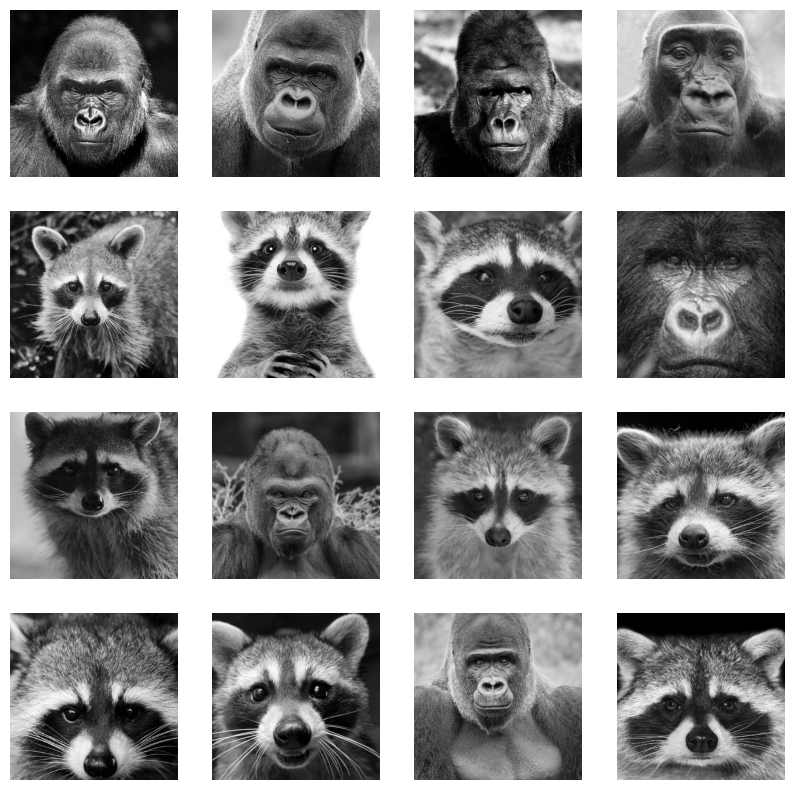

In [23]:

_, axes = plt.subplots(4, 4, figsize=(10, 10))

for ax, img_path in zip(axes.flatten(), all_paths):
    ax.imshow(Image.open(img_path))
    ax.axis("off")


In [24]:

## data/imgs.new.CIVS/h2_Ng90_Pci0_H0_Wp0_Ph300_Ox27_Ow3.0_Hbt1410_Wm12.2_Wr308750.4.jpg
## data/imgs.new.CIVS/h2o_Ng0_Pci150_H0_Wp0_Ph300_Ox24_Ow6_Hbt1459.8_Wm12.2_Wr308750.4.jpg
## data/imgs.new.CIVS/h2_Ng40_Pci60_H0_Wp0_Ph300_Ox23_Ow5_Hbt1459.8_Wm12.2_Wr308750.4.jpg

    
## ['tg', 'Ng0', 'Pci175', 'H0', 'Wp0', 'Ph300', 'Ox24', 'Ow7', 'Hbt1459.8', 'Wm12.2', 'Wr308750.4']
    


In [25]:

def label_func2(fname):
    ## print(fname)
    fname = fname.replace("photos","")
    temp_name = fname.replace(".jpg", "").split("_")
    ## print(temp_name)
    
  
    y0 = temp_name[0]                              ## tg
    y1 = float(temp_name[1].replace("FMD", ""))     ##  Facial Mask Darkness
    y2 = float(temp_name[2].replace("NS", ""))    ## Nose Shape 
    y3 = float(temp_name[3].replace("EyS", ""))     ## Eye Shape
    y4 = float(temp_name[4].replace("EaS", ""))    ## Ear Shape
    y5 = float(temp_name[5].replace("LS", ""))     ## Lip Size
    
 
    ## np.array([y0, y1, y2, y3, y4, y5 ])
    return [fname, y0, y1, y2, y3, y4, y5 ]


In [75]:

## 1400, 390
## x 0.2
## 280 , 78
## 140, 39   ## for web tool
## 1400, 390  * 0.4 = 560, 156


list_imgs = []
list_label_vectors = []
i = 0

for img_name in all_paths:
    temp_label_vector_rc = label_func2(img_name)
    
    print("Image path:", img_name)
    print("Label vector:", temp_label_vector_rc)
    
    my_img = Image.open(img_name)

    my_img = ImageOps.grayscale(my_img)

    img_np = np.array(my_img)
    
    list_imgs.append(img_np)
    list_label_vectors.append(temp_label_vector_rc)


Image path: photos\2_FMD1_NS6_EyS4_EaS2_LS4.jpg
Label vector: ['\\2_FMD1_NS6_EyS4_EaS2_LS4.jpg', '\\2', 1.0, 6.0, 4.0, 2.0, 4.0]
Image path: photos\30_FMD9_NS8_EyS4_EaS2_LS7.jpg
Label vector: ['\\30_FMD9_NS8_EyS4_EaS2_LS7.jpg', '\\30', 9.0, 8.0, 4.0, 2.0, 7.0]
Image path: photos\28_FMD8_NS5_EyS3_EaS2_LS6.jpg
Label vector: ['\\28_FMD8_NS5_EyS3_EaS2_LS6.jpg', '\\28', 8.0, 5.0, 3.0, 2.0, 6.0]
Image path: photos\11_FMD3_NS10_EyS6_EaS0_LS8.jpg
Label vector: ['\\11_FMD3_NS10_EyS6_EaS0_LS8.jpg', '\\11', 3.0, 10.0, 6.0, 0.0, 8.0]
Image path: photos\7_FMD2_NS5_EyS5_EaS7_LS0.jpg
Label vector: ['\\7_FMD2_NS5_EyS5_EaS7_LS0.jpg', '\\7', 2.0, 5.0, 5.0, 7.0, 0.0]
Image path: photos\6_FMD2_NS5_EyS2_EaS5_LS4.jpg
Label vector: ['\\6_FMD2_NS5_EyS2_EaS5_LS4.jpg', '\\6', 2.0, 5.0, 2.0, 5.0, 4.0]
Image path: photos\26_FMD7_NS6_EyS5_EaS4_LS5.jpg
Label vector: ['\\26_FMD7_NS6_EyS5_EaS4_LS5.jpg', '\\26', 7.0, 6.0, 5.0, 4.0, 5.0]
Image path: photos\27_FMD7_NS10_EyS3_EaS0_LS8.jpg
Label vector: ['\\27_FMD7_NS10_E

In [76]:
print("Number of image paths found:", len(all_paths))
X =  list_imgs
y =  list_label_vectors 


Number of image paths found: 30


In [142]:
print("Length of X:", len(X))
print("Length of y:", len(y))
if len(list_imgs) == 0 or len(list_label_vectors) == 0:
    print("Error: Dataset is empty. Make sure data is loaded correctly.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    #######################################################

    print(len(X_train))
    print(len(X_test))
    print(len(y_train)) 
    print(len(y_test))

Length of X: 30
Length of y: 30
24
6
24
6


In [143]:
X_train[0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1]], dtype=uint8)

In [147]:
list_ids_train = []
list_features_train = []
list_imgs_train = []

print("Length of y_train:", len(y_train))

# Check Data Annotation and Inspect y_train
print("Structure and contents of y_train:")
for item in y_train:
    print(item)

for index in range(len(X_train)):
    # image target (label)
    reg_vals = y_train[index]
    
    # Check if reg_vals has at least 12 elements
    if len(reg_vals) >= 12:
        target = np.zeros((10))
        target[0] = reg_vals[2]
        target[1] = reg_vals[3]
        target[2] = reg_vals[4]
        target[3] = reg_vals[5]
        target[4] = reg_vals[6]
        target[5] = reg_vals[7]
        target[6] = reg_vals[8]
        target[7] = reg_vals[9]
        target[8] = reg_vals[10]
        target[9] = reg_vals[11]

        # image data, normalised from 0-255 to 0-1
        single_np_img = X_train[index]

        list_ids_train.append(reg_vals[0])
        list_imgs_train.append(single_np_img)
        list_features_train.append(target)
    else:
        print(f"Skipping index {index}: reg_vals does not have enough elements")

Length of y_train: 24
Structure and contents of y_train:
['\\20_FMD5_NS5_EyS4_EaS6_LS1.jpg', '\\20', 5.0, 5.0, 4.0, 6.0, 1.0]
['\\13_FMD4_NS3_EyS3_EaS5_LS2.jpg', '\\13', 4.0, 3.0, 3.0, 5.0, 2.0]
['\\14_FMD4_NS4_EyS4_EaS2_LS0.jpg', '\\14', 4.0, 4.0, 4.0, 2.0, 0.0]
['\\2_FMD1_NS6_EyS4_EaS2_LS4.jpg', '\\2', 1.0, 6.0, 4.0, 2.0, 4.0]
['\\7_FMD2_NS5_EyS5_EaS7_LS0.jpg', '\\7', 2.0, 5.0, 5.0, 7.0, 0.0]
['\\10_FMD3_NS7_EyS6_EaS0_LS9.jpg', '\\10', 3.0, 7.0, 6.0, 0.0, 9.0]
['\\6_FMD2_NS5_EyS2_EaS5_LS4.jpg', '\\6', 2.0, 5.0, 2.0, 5.0, 4.0]
['\\25_FMD6_NS6_EyS7_EaS8_LS3.jpg', '\\25', 6.0, 6.0, 7.0, 8.0, 3.0]
['\\16_FMD4_NS5_EyS3_EaS6_LS2.jpg', '\\16', 4.0, 5.0, 3.0, 6.0, 2.0]
['\\12_FMD4_NS2_EyS3_EaS3_LS1.jpg', '\\12', 4.0, 2.0, 3.0, 3.0, 1.0]
['\\30_FMD9_NS8_EyS4_EaS2_LS7.jpg', '\\30', 9.0, 8.0, 4.0, 2.0, 7.0]
['\\28_FMD8_NS5_EyS3_EaS2_LS6.jpg', '\\28', 8.0, 5.0, 3.0, 2.0, 6.0]
['\\17_FMD4_NS6_EyS5_EaS1_LS6.jpg', '\\17', 4.0, 6.0, 5.0, 1.0, 6.0]
['\\11_FMD3_NS10_EyS6_EaS0_LS8.jpg', '\\11', 3.0, 10

In [144]:

list_imgs_train[0]


IndexError: list index out of range

In [145]:

conditions_matrix_train = np.array( list_features_train )
conditions_matrix_test  = np.array( list_features_test )


In [146]:

print( conditions_matrix_train.shape )
print( conditions_matrix_test.shape  )


(0,)
(0,)



## Save data for deployment


In [138]:

DF_conditions_train = pd.DataFrame(conditions_matrix_train)
DF_conditions_train.to_csv("PD_conditions_train.csv")


In [140]:

DF_ids_train = pd.DataFrame(list_ids_train)
DF_ids_train.to_csv("PD_ids_train.csv")


In [141]:

list_imgs_train[17]


IndexError: list index out of range

In [105]:

list_imgs_train[17].shape


IndexError: list index out of range

In [106]:

list_imgs_train_stretched = [     the_img_np.reshape(-1)         for the_img_np in list_imgs_train ]


In [107]:

list_imgs_train_stretched[0]


IndexError: list index out of range

In [108]:

list_imgs_train_stretched[4].shape


IndexError: list index out of range

In [109]:

list_imgs_train_stretched[4][:1000]


IndexError: list index out of range

In [110]:

list_imgs_train_stretched[7].shape


IndexError: list index out of range


## Keeps scale at 0..255


In [111]:

np_list_imgs_train_stretched = np.array( list_imgs_train_stretched )  


In [112]:

np_list_imgs_train_stretched.shape


(0,)

In [113]:

np_list_imgs_train_stretched[3]


IndexError: index 3 is out of bounds for axis 0 with size 0

In [114]:

DF_imgs_np_train = pd.DataFrame(np_list_imgs_train_stretched)


In [115]:

DF_imgs_np_train


,0


In [116]:

DF_imgs_np_train.to_csv("PD_imgs_np_train.csv")



## Follow Web tool logic


In [117]:


url1 = "PD_ids_train.csv"
pd_ids_train = pd.read_csv(url1)
pd_ids_train_np = pd_ids_train.to_numpy()
pd_ids_train_np = pd_ids_train_np[1:, 1:]


In [118]:

url2 = "PD_conditions_train.csv"
pd_conditions_train = pd.read_csv(url2)
pd_conditions_train_np = pd_conditions_train.to_numpy()
pd_conditions_train_np   = pd_conditions_train_np[1:, 1:]


In [119]:


url3 = "PD_imgs_np_train.csv"
pd_imgs_np_train = pd.read_csv(url3)
pd_imgs_np_train_np = pd_imgs_np_train.to_numpy()
pd_imgs_np_train_np      = pd_imgs_np_train_np[1:, 1:]




## KNN part


In [120]:

def euclidean_distance(v1, v2):
    return np.sqrt( np.sum(   (v1 - v2)**2   )   )



In [121]:

def predict(test_x):
    
    ## calculate distances between test_x and all dta samples in x
    ## this distances vector is a vector of 45 distances
    ## distances = [ euclidean_distance(test_x , x)  for x in X_train    ]

    distances = [ euclidean_distance(test_x, x )  for x in pd_conditions_train_np  ]
      
    
    ## distances - > [23, 3, 145, 17, ...]
    
    k = 3
    
    ## sort by distance value and return the k nearest neighbors
    ## np.argsort returns the indices of the k neares neighbors
    k_neighbor_indices = np.argsort(distances)[:k]
    print(k_neighbor_indices)
    
    
    ## with indices, extract labels from y_train 
    selected_imgs_to_avg = [ pd_imgs_np_train_np[i] for i in k_neighbor_indices  ]
    

    return selected_imgs_to_avg


In [122]:

np.set_printoptions(suppress=True)
print( conditions_matrix_test[:10, :] )


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [123]:

def generate_img_per_index(index):
    
    selected_imgs_to_avg = predict( conditions_matrix_test[  index  ] )
    the_test_conditions = conditions_matrix_test[  index  ]
    
    
    avg_gen_img = np.mean( np.array(selected_imgs_to_avg), axis=0 )
    avg_gen_img = avg_gen_img.astype(int)
    gen_pil_image = avg_gen_img
    
    real_my_img = np.array(list_imgs_test[index])
    real_pil_image = Image.fromarray(real_my_img)
    real_pil_image = ImageOps.grayscale(real_pil_image)
    
    print(gen_pil_image)
    print(real_pil_image)
    
    return the_test_conditions, gen_pil_image, real_pil_image


In [124]:

the_test_conditions, gen_pil_image, real_pil_image = generate_img_per_index(17)


the_test_conditions = the_test_conditions.astype(int)
str_conditions = np.array2string(the_test_conditions, precision=0, separator=',', suppress_small=True)
str_conditions = str_conditions.replace(" ","")
str_conditions = str_conditions.replace("[","")
str_conditions = str_conditions.replace("]","")

## print(str_conditions)
                 

fig, ax = plt.subplots(1,2)

ax[0].imshow(gen_pil_image)
ax[1].imshow(real_pil_image)

ax[0].set_title("Gen: " + str_conditions)
ax[1].set_title("real")


IndexError: index 17 is out of bounds for axis 0 with size 0

In [125]:

for test_i in range( conditions_matrix_test.shape[0]  ):


    the_test_conditions, gen_pil_image, real_pil_image = generate_img_per_index(test_i)
    
    the_test_conditions = the_test_conditions.astype(int)
    str_conditions = np.array2string(the_test_conditions, precision=0, separator=',', suppress_small=True)
    str_conditions = str_conditions.replace(" ","")
    str_conditions = str_conditions.replace("[","")
    str_conditions = str_conditions.replace("]","")

    ## print(str_conditions)

    fig, ax = plt.subplots(1,2)
    ax[0].imshow(gen_pil_image)
    ax[1].imshow(real_pil_image)
    
    ax[0].set_title("Gen: " + str_conditions)
    ax[1].set_title("real")
